In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.actor_critic import A2C
from networks.a2c.actor import Actor
from networks.a2c.critic import Critic

import gym
import matplotlib.pyplot as plt
import torch

In [2]:
norm_cols = ['open', 'high', 'low', 'close', f'Volume XRP']
cols = ['date'] + norm_cols
batch_dur = 30
env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-05-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)

/Users/vinay/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/vinay/code/git/smart-broker/notebooks/../environment.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['rolling_price'] = self.df[self.price_typ].rolling(self.roll_period).sum()
/Users/vinay/miniforge3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [3]:
actor_model = Actor(
    state_dim=batch_dur*3+3,
    action_dim=3,
)
critic_model = Critic(state_dim=batch_dur*3+3)
a2c = A2C(
    env=env, 
    actor=actor_model,
    critic=critic_model,
    n_actns=3,
    actor_optmz=torch.optim.Adam(actor_model.parameters(), lr=0.001),
    critic_optmz=torch.optim.Adam(critic_model.parameters(), lr=0.001),
    hyprprms={
        'gamma': 0.9995,
    },
    log_freq=25,
)

In [4]:
a2c.run(1000)


Ep: 0 | L: 0.103 | R: 34385.93 | R.Avg.R: 34385.93 | P: 70 | R.Avg P: 70 | B: 82 | R.Avg B: 82 | R.N_Units: 9318
Ep: 25 | L: 0.044 | R: 14928.17 | R.Avg.R: 41429.29 | P: 30 | R.Avg P: 83 | B: 70 | R.Avg B: 92 | R.N_Units: 9728
Ep: 50 | L: 0.148 | R: 42752.51 | R.Avg.R: 47949.26 | P: 88 | R.Avg P: 91 | B: 97 | R.Avg B: 93 | R.N_Units: 10424
Ep: 75 | L: 0.043 | R: 21402.98 | R.Avg.R: 39938.95 | P: 44 | R.Avg P: 90 | B: 62 | R.Avg B: 88 | R.N_Units: 10882

## Visualizations

### Traning 

Text(0.5, 1.0, 'Rolling avg balance per episode')

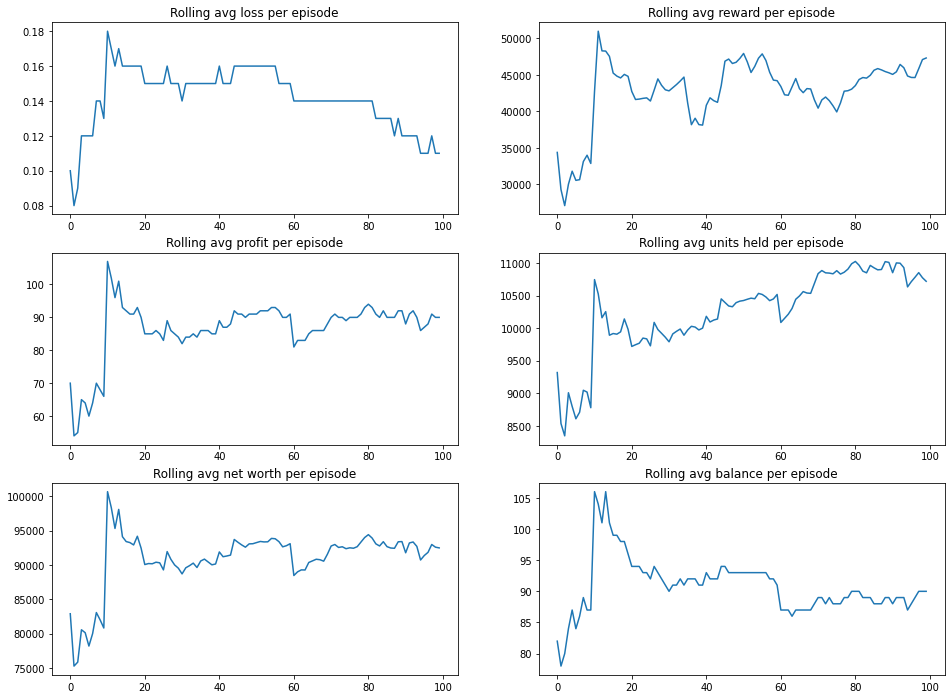

In [7]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in a2c.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')